# Combining Datasets

- SDOH

Combining Urban County Data
- CENSUS
- MGV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:

#brfss1 = pd.read_csv('BRFSS_cleaned.csv')#.drop(['Display_order', 'GeoLocation'], axis=1).dropna() # if we filter by only Texas we result in data from Coleman county - which is rural
sdoh = pd.read_csv('SDOH_County_TEXAS_Labeled.csv').drop(['Unnamed: 0', 'STATEFIPS', 'STATE'],axis=1)


# these two datasets result in only containing urban information
mgv = pd.read_csv('MGV_Labeled.csv').drop('BENE_GEO_CD', axis=1)
census = pd.read_csv('2020_Census_ua_st_list_all_TEXAS.csv').drop(['Unnamed: 0', 'STATE', 'STATEFP'],axis=1)

## 2020 SDOH County Level

In [19]:
sdoh['COUNTY'] = sdoh['COUNTY'].str.replace('County', '', regex=False)
#sdoh = sdoh.drop('YEAR', axis=1)
sdoh

,YEAR,COUNTYFIPS,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HEALTH_INC_138_199

In [20]:
# Count unique values in each column
unique_counts = sdoh.nunique()

# Calculate min, max, and median
min_count = unique_counts.min()
max_count = unique_counts.max()
median_count = unique_counts.median()

print(f"Minimum unique count: {min_count}")
print(f"Maximum unique count: {max_count}")
print(f"Median unique count: {median_count}")

Minimum unique count: 1
Maximum unique count: 254
Median unique count: 177.0


In [21]:
print(sdoh['COUNTY'].nunique())
print(sdoh['TERRITORY'].value_counts())
print(sdoh['AHRF_URC_2013'].value_counts())


254
TERRITORY
0    254
Name: count, dtype: int64
AHRF_URC_2013
1.0    95
0.0    71
Name: count, dtype: int64


### BRFSS County Level
Texas only has one entry rural County according to the [2020 Census](https://txcip.org/tac/census/profile.php?FIPS=48083)

In [3]:
brfss1

,Year,Sample_Size,Confidence_limit_Low,Confidence_limit_High,Display_order,GeoLocation,Alabama,Alaska,All States and DC (median) **,"All States, DC and Territories (median) **",Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Age Group,Education Attained,Gender,Household Income_x,Overall,Race/Ethnicity_x,Aerobic & Muscle Strength Activity,Aerobic Activity 150+ min/week,Age,Alcohol Use (30 Days),Angina/CHD Awareness,Arthritis Awareness,Asthma Awareness,BMI Classification,Binge Drinking,CHD/MI Awareness,COPD Awareness,Children in Household,Cholesterol Check (5 Years),Cognitive Difficulty,Current Asthma Awareness,Current E-Cigarette Use,Current Smokers,Deafness,Depression Awareness,Diabetes Awareness,Doctor Visit Affordability,Dressing/Bathing Difficulty,Drunk Driving,E-Cigarette Use Frequency,Education Level,Employment Status,Errands Difficulty,Flu Shot (65+),General Health,HIV Testing,Health Insurance (18-64),Health Insurance Coverage,Health Status,Heart Attack Awareness,Heavy Drinking,High Blood Pressure Awareness,High Cholesterol Awareness,Household Income_y,Kidney Disease Awareness,Last Doctor Visit,Marital Status,Military Service,Mobility Difficulty,Muscle Strength Activity,Other Cancer Awareness,Physical Activity (30 Days),Pneumonia Vaccination (65+),Poor Mental Health Days,Poor Physical Health Days,Primary Healthcare Provider,Race/Ethnicity_y,Seat Belt Use,Skin Cancer Awareness,Smokeless Tobacco Use,Smoking Status,Stroke Awareness,Vision Difficulty
0,2023.0,108.0,12.4,20.7,71.0,"(13.444304, 144.793731)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55-64,H.S. or G.E.D.,Female,"$100,000-$199,999",Overall,Hispanic,No,No,35-44 years,Yes,No,Yes,Yes,Normal Weight (BMI 18.5-24.9),No,Did not report having MI or CHD,Yes,Five or more children,Checked in past 5 years,No,No,Current E-cigarette user,No,No,No,No,No,No,Have driven after having too much to drink,Current E-cigarette user - every day,College+,Retired,No,No,Fair,No,Do not have some form of health insurance,Do not have some form of health insurance,Fair or Poor Health,No,Do not meet criteria for heavy drinking,No,No,"$50,000 - 99,999",No,Within the past 2 years,Divorced,No,Yes,Yes,No,No,Yes,1-13 days when mental health not good,1-13 days when physical health not good,"Yes, only one","American Indian or Alaskan Native, non-Hispanic",Yes,No,Not at all,Never smoked,No,No
1,2023.0,128.0,14.1,22.4,72.0,"(13.444304, 144.793731)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55-64,H.S. or G.E.D.,Female,"$100,000-$199,999",Overall,Hispanic,No,No,35-44 years,Yes,No,Yes,Yes,Normal Weight (BMI 18.5-24.9),No,Did not report having MI or CHD,Yes,Five or more children,Checked in past 5 years,No,No,Current E-cigarette user,No,No,No,No,No,No,Have driven after having too much to drink,Current E-cigarette user - every day,College+,Retired,No,No,Fair,No,Do not have some form of health insurance,Do not have some form of health insurance,Fair or Poor Health,No,Do not meet criteria for heavy drinking,No,No,"$50,000 - 99,999",No,Within the past 2 years,Divorced,No,Yes,Yes,No,No,Yes,1-13 days when mental health not good,1-13 days when physical health not good,"Yes, only one","American Indian or Alaskan Native, non-Hispanic",Yes,No,Not

In [4]:
# Count unique values in each column
unique_counts = brfss1.nunique()

# Calculate min, max, and median
min_count = unique_counts.min()
max_count = unique_counts.max()
median_count = unique_counts.median()

print(f"Minimum unique count: {min_count}")
print(f"Maximum unique count: {max_count}")
print(f"Median unique count: {median_count}")

Minimum unique count: 1
Maximum unique count: 7601
Median unique count: 2.0


In [7]:
brfss1

,Year,Sample_Size,Confidence_limit_Low,Confidence_limit_High,Display_order,GeoLocation,Alabama,Alaska,All States and DC (median) **,"All States, DC and Territories (median) **",Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Age Group,Education Attained,Gender,Household Income_x,Overall,Race/Ethnicity_x,Aerobic & Muscle Strength Activity,Aerobic Activity 150+ min/week,Age,Alcohol Use (30 Days),Angina/CHD Awareness,Arthritis Awareness,Asthma Awareness,BMI Classification,Binge Drinking,CHD/MI Awareness,COPD Awareness,Children in Household,Cholesterol Check (5 Years),Cognitive Difficulty,Current Asthma Awareness,Current E-Cigarette Use,Current Smokers,Deafness,Depression Awareness,Diabetes Awareness,Doctor Visit Affordability,Dressing/Bathing Difficulty,Drunk Driving,E-Cigarette Use Frequency,Education Level,Employment Status,Errands Difficulty,Flu Shot (65+),General Health,HIV Testing,Health Insurance (18-64),Health Insurance Coverage,Health Status,Heart Attack Awareness,Heavy Drinking,High Blood Pressure Awareness,High Cholesterol Awareness,Household Income_y,Kidney Disease Awareness,Last Doctor Visit,Marital Status,Military Service,Mobility Difficulty,Muscle Strength Activity,Other Cancer Awareness,Physical Activity (30 Days),Pneumonia Vaccination (65+),Poor Mental Health Days,Poor Physical Health Days,Primary Healthcare Provider,Race/Ethnicity_y,Seat Belt Use,Skin Cancer Awareness,Smokeless Tobacco Use,Smoking Status,Stroke Awareness,Vision Difficulty
0,2023.0,108.0,12.4,20.7,71.0,"(13.444304, 144.793731)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55-64,H.S. or G.E.D.,Female,"$100,000-$199,999",Overall,Hispanic,No,No,35-44 years,Yes,No,Yes,Yes,Normal Weight (BMI 18.5-24.9),No,Did not report having MI or CHD,Yes,Five or more children,Checked in past 5 years,No,No,Current E-cigarette user,No,No,No,No,No,No,Have driven after having too much to drink,Current E-cigarette user - every day,College+,Retired,No,No,Fair,No,Do not have some form of health insurance,Do not have some form of health insurance,Fair or Poor Health,No,Do not meet criteria for heavy drinking,No,No,"$50,000 - 99,999",No,Within the past 2 years,Divorced,No,Yes,Yes,No,No,Yes,1-13 days when mental health not good,1-13 days when physical health not good,"Yes, only one","American Indian or Alaskan Native, non-Hispanic",Yes,No,Not at all,Never smoked,No,No
1,2023.0,128.0,14.1,22.4,72.0,"(13.444304, 144.793731)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55-64,H.S. or G.E.D.,Female,"$100,000-$199,999",Overall,Hispanic,No,No,35-44 years,Yes,No,Yes,Yes,Normal Weight (BMI 18.5-24.9),No,Did not report having MI or CHD,Yes,Five or more children,Checked in past 5 years,No,No,Current E-cigarette user,No,No,No,No,No,No,Have driven after having too much to drink,Current E-cigarette user - every day,College+,Retired,No,No,Fair,No,Do not have some form of health insurance,Do not have some form of health insurance,Fair or Poor Health,No,Do not meet criteria for heavy drinking,No,No,"$50,000 - 99,999",No,Within the past 2 years,Divorced,No,Yes,Yes,No,No,Yes,1-13 days when mental health not good,1-13 days when physical health not good,"Yes, only one","American Indian or Alaskan Native, non-Hispanic",Yes,No,Not

### MGV County Level

In [8]:
mgv.shape

(2295, 245)

In [9]:
mgv

,COUNTY,YEAR,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,BENE_AVG_AGE,BENE_FEML_PCT,BENE_MALE_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_OTHR_PCT,BENE_DUAL_PCT,BENE_AVG_RISK_SCRE,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_MDCR_PYMT_PC,TOT_MDCR_STDZD_PYMT_PC,IP_MDCR_PYMT_AMT,IP_MDCR_PYMT_PCT,IP_MDCR_PYMT_PC,IP_MDCR_PYMT_PER_USER,IP_MDCR_STDZD_PYMT_AMT,IP_MDCR_STDZD_PYMT_PCT,IP_MDCR_STDZD_PYMT_PC,IP_MDCR_STDZD_PYMT_PER_USER,BENES_IP_CVRD_STAY_CNT,BENES_IP_PCT,IP_CVRD_STAYS_PER_1000_BENES,IP_CVRD_DAYS_PER_1000_BENES,ACUTE_HOSP_READMSN_CNT,ACUTE_HOSP_READMSN_PCT,BENES_ER_VISITS_CNT,ER_VISITS_PER_1000_BENES,BENES_ER_VISITS_PCT,OP_MDCR_PYMT_AMT,OP_MDCR_PYMT_PCT,OP_MDCR_PYMT_PC,OP_MDCR_PYMT_PER_USER,OP_MDCR_STDZD_PYMT_AMT,OP_MDCR_STDZD_PYMT_PCT,OP_MDCR_STDZD_PYMT_PC,OP_MDCR_STDZD_PYMT_PER_USER,BENES_OP_CNT,BENES_OP_PCT,OP_VISITS_PER_1000_BENES,ASC_MDCR_PYMT_AMT,ASC_MDCR_PYMT_PCT,ASC_MDCR_PYMT_PC,ASC_MDCR_PYMT_PER_USER,ASC_MDCR_STDZD_PYMT_AMT,ASC_MDCR_STDZD_PYMT_PCT,ASC_MDCR_STDZD_PYMT_PC,ASC_MDCR_STDZD_PYMT_PER_USER,BENES_ASC_CNT,BENES_ASC_PCT,ASC_EVNTS_PER_1000_BENES,SNF_MDCR_PYMT_AMT,SNF_MDCR_PYMT_PCT,SNF_MDCR_PYMT_PC,SNF_MDCR_PYMT_PER_USER,SNF_MDCR_STDZD_PYMT_AMT,SNF_MDCR_STDZD_PYMT_PCT,SNF_MDCR_STDZD_PYMT_PC,SNF_MDCR_STDZD_PYMT_PER_USER,BENES_SNF_CNT,BENES_SNF_PCT,SNF_CVRD_STAYS_PER_1000_BENES,SNF_CVRD_DAYS_PER_1000_BENES,IRF_MDCR_PYMT_AMT,IRF_MDCR_PYMT_PCT,IRF_MDCR_PYMT_PC,IRF_MDCR_PYMT_PER_USER,IRF_MDCR_STDZD_PYMT_AMT,IRF_MDCR_STDZD_PYMT_PCT,IRF_MDCR_STDZD_PYMT_PC,IRF_MDCR_STDZD_PYMT_PER_USER,BENES_IRF_CNT,BENES_IRF_PCT,IRF_CVRD_STAYS_PER_1000_BENES,IRF_CVRD_DAYS_PER_1000_BENES,LTCH_MDCR_PYMT_AMT,LTCH_MDCR_PYMT_PCT,LTCH_MDCR_PYMT_PC,LTCH_MDCR_PYMT_PER_USER,LTCH_MDCR_STDZD_PYMT_AMT,LTCH_MDCR_STDZD_PYMT_PCT,LTCH_MDCR_STDZD_PYMT_PC,LTCH_MDCR_STDZD_PYMT_PER_USER,BENES_LTCH_CNT,BENES_LTCH_PCT,LTCH_CVRD_STAYS_PER_1000_BENES,LTCH_CVRD_DAYS_PER_1000_BENES,HH_MDCR_PYMT_AMT,HH_MDCR_PYMT_PCT,HH_MDCR_PYMT_PC,HH_MDCR_PYMT_PER_USER,HH_MDCR_STDZD_PYMT_AMT,HH_MDCR_STDZD_PYMT_PCT,HH_MDCR_STDZD_PYMT_PC,HH_MDCR_STDZD_PYMT_PER_USER,BENES_HH_CNT,BENES_HH_PCT,HH_EPISODES_PER_1000_BENES,HH_VISITS_PER_1000_BENES,HOSPC_MDCR_PYMT_AMT,HOSPC_MDCR_PYMT_PCT,HOSPC_MDCR_PYMT_PC,HOSPC_MDCR_PYMT_PER_USER,HOSPC_MDCR_STDZD_PYMT_AMT,HOSPC_MDCR_STDZD_PYMT_PCT,HOSPC_MDCR_STDZD_PYMT_PC,HOSPC_MDCR_STDZD_PYMT_PER_USER,BENES_HOSPC_CNT,BENES_HOSPC_PCT,HOSPC_CVRD_STAYS_PER_1000_BENES,HOSPC_CVRD_DAYS_PER_1000_BENES,EM_MDCR_PYMT_AMT,EM_MDCR_PYMT_PCT,EM_MDCR_PYMT_PC,EM_MDCR_PYMT_PER_USER,EM_MDCR_STDZD_PYMT_AMT,EM_MDCR_STDZD_PYMT_PCT,EM_MDCR_STDZD_PYMT_PC,EM_MDCR_STDZD_PYMT_PER_USER,BENES_EM_CNT,BENES_EM_PCT,EM_EVNTS_PER_1000_BENES,PRCDRS_MDCR_PYMT_AMT,PRCDRS_MDCR_PYMT_PCT,PRCDRS_MDCR_PYMT_PC,PRCDRS_MDCR_PYMT_PER_USER,PRCDRS_MDCR_STDZD_PYMT_AMT,PRCDRS_MDCR_STDZD_PYMT_PCT,PRCDRS_MDCR_STDZD_PYMT_PC,PRCDRS_MDCR_STDZD_PYMT_PER_USER,BENES_PRCDRS_CNT,BENES_PRCDRS_PCT,PRCDR_EVNTS_PER_1000_BENES,TESTS_MDCR_PYMT_AMT,TESTS_MDCR_PYMT_PCT,TESTS_MDCR_PYMT_PC,TESTS_MDCR_PYMT_PER_USER,TESTS_MDCR_STDZD_PYMT_AMT,TESTS_MDCR_STDZD_PYMT_PCT,TESTS_MDCR_STDZD_PYMT_PC,TESTS_MDCR_STDZD_PYMT_PER_USER,BENES_TESTS_CNT,BENES_TESTS_PCT,TESTS_EVNTS_PER_1000_BENES,IMGNG_MDCR_PYMT_AMT,IMGNG_MDCR_PYMT_PCT,IMGNG_MDCR_PYMT_PC,IMGNG_MDCR_PYMT_PER_USER,IMGNG_MDCR_STDZD_PYMT_AMT,IMGNG_MDCR_STDZD_PYMT_PCT,IMGNG_MDCR_STDZD_PYMT_PC,IMGNG_MDCR_STDZD_PYMT_PER_USER,BENES_IMGNG_CNT,BENES_IMGNG_PCT,IMGNG_EVNTS_PER_1000_BENES,DME_MDCR_PYMT_AMT,DME_MDCR_PYMT_PCT,DME_MDCR_PYMT_PC,DME_MDCR_PYMT_PER_USER,DME_MDCR_STDZD_PYMT_AMT,DME_MDCR_STDZD_PYMT_PCT,DME_MDCR_STDZD_PYMT_PC,DME_MDCR_STDZD_PYMT_PER_USER,BENES_DME_CNT,BENES_DME_PCT,DME_EVNTS_PER_1000_BENES,OP_DLYS_MDCR_PYMT_AMT,OP_DLYS_MDCR_PYMT_PCT,OP_DLYS_MDCR_PYMT_PC,OP_DLYS_MDCR_PYMT_PER_USER,OP_DLYS_MDCR_STDZD_PYMT_AMT,OP_DLYS_MDCR_STDZD_PYMT_PCT,OP_DLYS_MDCR_STDZD_PYMT_PC,OP_DLYS_MDCR_STDZD_PYMT_PER_USER,BENES_OP_DLYS_CNT,BENES_OP_DLYS_PCT,OP_DLYS_VISITS_PER_1000_BENES,FQHC_RHC_MDCR_PYMT_AMT,FQHC_RHC_MDCR

In [10]:
# Count unique values in each column
unique_counts = mgv.nunique()

# Calculate min, max, and median
min_count = unique_counts.min()
max_count = unique_counts.max()
median_count = unique_counts.median()

print(f"Minimum unique count: {min_count}")
print(f"Maximum unique count: {max_count}")
print(f"Median unique count: {median_count}")

Minimum unique count: 1
Maximum unique count: 2285
Median unique count: 1740.0


In [11]:
mgv['COUNTY'].unique().tolist()

['Anderson',
 'Andrews',
 'Angelina',
 'Aransas',
 'Archer',
 'Armstrong',
 'Atascosa',
 'Austin',
 'Bailey',
 'Bandera',
 'Bastrop',
 'Baylor',
 'Bee',
 'Bell',
 'Bexar',
 'Blanco',
 'Borden',
 'Bosque',
 'Bowie',
 'Brazoria',
 'Brazos',
 'Brewster',
 'Briscoe',
 'Brooks',
 'Brown',
 'Burleson',
 'Burnet',
 'Caldwell',
 'Calhoun',
 'Callahan',
 'Cameron',
 'Camp',
 'Carson',
 'Cass',
 'Castro',
 'Chambers',
 'Cherokee',
 'Childress',
 'Clay',
 'Cochran',
 'Coke',
 'Coleman',
 'Collin',
 'Collingsworth',
 'Colorado',
 'Comal',
 'Comanche',
 'Concho',
 'Cooke',
 'Coryell',
 'Cottle',
 'Crane',
 'Crockett',
 'Crosby',
 'Culberson',
 'Dallam',
 'Dallas',
 'Dawson',
 'DeWitt',
 'Deaf Smith',
 'Delta',
 'Denton',
 'Dickens',
 'Dimmit',
 'Donley',
 'Duval',
 'Eastland',
 'Ector',
 'Edwards',
 'El Paso',
 'Ellis',
 'Erath',
 'Falls',
 'Fannin',
 'Fayette',
 'Fisher',
 'Floyd',
 'Foard',
 'Fort Bend',
 'Franklin',
 'Freestone',
 'Frio',
 'Gaines',
 'Galveston',
 'Garza',
 'Gillespie',
 'Glassc

### ONLY CENSUS Urban Counties - County Level

In [12]:
census.shape

(195, 10)

In [13]:
census['NAME'].unique().tolist()

['Abilene',
 'Alice',
 'Alpine',
 'Alvarado',
 'Amarillo',
 'Andrews',
 'Angleton',
 'Aransas Pass--Port Aransas--Ingleside',
 'Athens',
 'Atlanta',
 'Aubrey',
 'Austin',
 'Bastrop',
 'Bay City',
 'Beaumont',
 'Beeville',
 'Belterra',
 'Big Spring',
 'Boerne',
 'Bonham',
 'Borger',
 'Bowie',
 'Brady',
 'Breckenridge',
 'Brenham',
 'Brownfield',
 'Brownsville',
 'Brownwood',
 'Burkburnett',
 'Burnet',
 'Cameron',
 'Canyon',
 'Canyon Lake',
 'Carrizo Springs',
 'Carthage',
 'Center',
 'Childress',
 'Cleburne',
 'Cleveland',
 'Coleman',
 'College Station--Bryan',
 'Colorado City',
 'Commerce',
 'Corpus Christi',
 'Corsicana',
 'Crockett',
 'Crystal City',
 'Cuero',
 'Dalhart',
 'Dallas--Fort Worth--Arlington',
 'Dayton',
 'Decatur',
 'Del Rio',
 'Denton--Lewisville',
 'Denton Southwest',
 'Dumas',
 'Eagle Pass',
 'Edna',
 'El Campo',
 'Elgin',
 'El Paso',
 'Elsa',
 'Ennis',
 'Fabens',
 'Falfurrias',
 'Floresville',
 'Forney',
 'Fort Stockton',
 'Fredericksburg',
 'Gainesville',
 'Galvesto

In [14]:
# Count unique values in each column
unique_counts = census.nunique()

# Calculate min, max, and median
min_count = unique_counts.min()
max_count = unique_counts.max()
median_count = unique_counts.median()

print(f"Minimum unique count: {min_count}")
print(f"Maximum unique count: {max_count}")
print(f"Median unique count: {median_count}")

Minimum unique count: 2
Maximum unique count: 195
Median unique count: 194.0


In [15]:
print(census['NAME'].nunique())
print(census['PART'].value_counts())

195
PART
0    193
P      2
Name: count, dtype: int64


## Joining MGV and CENSUS data - only have Urban data

In [16]:
mgv['key'] = 1
census['key'] = 1
cross_join = pd.merge(mgv, census, on='key').drop('key', axis=1)

filtered = cross_join[cross_join.apply(lambda row: row['NAME'].lower() in row['COUNTY'].lower(), axis=1)]
# Drop duplicates or unnecessary columns if needed
result = filtered.drop('NAME', axis=1).drop_duplicates()

In [18]:
result['Urban'].value_counts()

Urban
1    261
Name: count, dtype: int64

In [17]:
result

,COUNTY,YEAR,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,BENE_AVG_AGE,BENE_FEML_PCT,BENE_MALE_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_OTHR_PCT,BENE_DUAL_PCT,BENE_AVG_RISK_SCRE,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_MDCR_PYMT_PC,TOT_MDCR_STDZD_PYMT_PC,IP_MDCR_PYMT_AMT,IP_MDCR_PYMT_PCT,IP_MDCR_PYMT_PC,IP_MDCR_PYMT_PER_USER,IP_MDCR_STDZD_PYMT_AMT,IP_MDCR_STDZD_PYMT_PCT,IP_MDCR_STDZD_PYMT_PC,IP_MDCR_STDZD_PYMT_PER_USER,BENES_IP_CVRD_STAY_CNT,BENES_IP_PCT,IP_CVRD_STAYS_PER_1000_BENES,IP_CVRD_DAYS_PER_1000_BENES,ACUTE_HOSP_READMSN_CNT,ACUTE_HOSP_READMSN_PCT,BENES_ER_VISITS_CNT,ER_VISITS_PER_1000_BENES,BENES_ER_VISITS_PCT,OP_MDCR_PYMT_AMT,OP_MDCR_PYMT_PCT,OP_MDCR_PYMT_PC,OP_MDCR_PYMT_PER_USER,OP_MDCR_STDZD_PYMT_AMT,OP_MDCR_STDZD_PYMT_PCT,OP_MDCR_STDZD_PYMT_PC,OP_MDCR_STDZD_PYMT_PER_USER,BENES_OP_CNT,BENES_OP_PCT,OP_VISITS_PER_1000_BENES,ASC_MDCR_PYMT_AMT,ASC_MDCR_PYMT_PCT,ASC_MDCR_PYMT_PC,ASC_MDCR_PYMT_PER_USER,ASC_MDCR_STDZD_PYMT_AMT,ASC_MDCR_STDZD_PYMT_PCT,ASC_MDCR_STDZD_PYMT_PC,ASC_MDCR_STDZD_PYMT_PER_USER,BENES_ASC_CNT,BENES_ASC_PCT,ASC_EVNTS_PER_1000_BENES,SNF_MDCR_PYMT_AMT,SNF_MDCR_PYMT_PCT,SNF_MDCR_PYMT_PC,SNF_MDCR_PYMT_PER_USER,SNF_MDCR_STDZD_PYMT_AMT,SNF_MDCR_STDZD_PYMT_PCT,SNF_MDCR_STDZD_PYMT_PC,SNF_MDCR_STDZD_PYMT_PER_USER,BENES_SNF_CNT,BENES_SNF_PCT,SNF_CVRD_STAYS_PER_1000_BENES,SNF_CVRD_DAYS_PER_1000_BENES,IRF_MDCR_PYMT_AMT,IRF_MDCR_PYMT_PCT,IRF_MDCR_PYMT_PC,IRF_MDCR_PYMT_PER_USER,IRF_MDCR_STDZD_PYMT_AMT,IRF_MDCR_STDZD_PYMT_PCT,IRF_MDCR_STDZD_PYMT_PC,IRF_MDCR_STDZD_PYMT_PER_USER,BENES_IRF_CNT,BENES_IRF_PCT,IRF_CVRD_STAYS_PER_1000_BENES,IRF_CVRD_DAYS_PER_1000_BENES,LTCH_MDCR_PYMT_AMT,LTCH_MDCR_PYMT_PCT,LTCH_MDCR_PYMT_PC,LTCH_MDCR_PYMT_PER_USER,LTCH_MDCR_STDZD_PYMT_AMT,LTCH_MDCR_STDZD_PYMT_PCT,LTCH_MDCR_STDZD_PYMT_PC,LTCH_MDCR_STDZD_PYMT_PER_USER,BENES_LTCH_CNT,BENES_LTCH_PCT,LTCH_CVRD_STAYS_PER_1000_BENES,LTCH_CVRD_DAYS_PER_1000_BENES,HH_MDCR_PYMT_AMT,HH_MDCR_PYMT_PCT,HH_MDCR_PYMT_PC,HH_MDCR_PYMT_PER_USER,HH_MDCR_STDZD_PYMT_AMT,HH_MDCR_STDZD_PYMT_PCT,HH_MDCR_STDZD_PYMT_PC,HH_MDCR_STDZD_PYMT_PER_USER,BENES_HH_CNT,BENES_HH_PCT,HH_EPISODES_PER_1000_BENES,HH_VISITS_PER_1000_BENES,HOSPC_MDCR_PYMT_AMT,HOSPC_MDCR_PYMT_PCT,HOSPC_MDCR_PYMT_PC,HOSPC_MDCR_PYMT_PER_USER,HOSPC_MDCR_STDZD_PYMT_AMT,HOSPC_MDCR_STDZD_PYMT_PCT,HOSPC_MDCR_STDZD_PYMT_PC,HOSPC_MDCR_STDZD_PYMT_PER_USER,BENES_HOSPC_CNT,BENES_HOSPC_PCT,HOSPC_CVRD_STAYS_PER_1000_BENES,HOSPC_CVRD_DAYS_PER_1000_BENES,EM_MDCR_PYMT_AMT,EM_MDCR_PYMT_PCT,EM_MDCR_PYMT_PC,EM_MDCR_PYMT_PER_USER,EM_MDCR_STDZD_PYMT_AMT,EM_MDCR_STDZD_PYMT_PCT,EM_MDCR_STDZD_PYMT_PC,EM_MDCR_STDZD_PYMT_PER_USER,BENES_EM_CNT,BENES_EM_PCT,EM_EVNTS_PER_1000_BENES,PRCDRS_MDCR_PYMT_AMT,PRCDRS_MDCR_PYMT_PCT,PRCDRS_MDCR_PYMT_PC,PRCDRS_MDCR_PYMT_PER_USER,PRCDRS_MDCR_STDZD_PYMT_AMT,PRCDRS_MDCR_STDZD_PYMT_PCT,PRCDRS_MDCR_STDZD_PYMT_PC,PRCDRS_MDCR_STDZD_PYMT_PER_USER,BENES_PRCDRS_CNT,BENES_PRCDRS_PCT,PRCDR_EVNTS_PER_1000_BENES,TESTS_MDCR_PYMT_AMT,TESTS_MDCR_PYMT_PCT,TESTS_MDCR_PYMT_PC,TESTS_MDCR_PYMT_PER_USER,TESTS_MDCR_STDZD_PYMT_AMT,TESTS_MDCR_STDZD_PYMT_PCT,TESTS_MDCR_STDZD_PYMT_PC,TESTS_MDCR_STDZD_PYMT_PER_USER,BENES_TESTS_CNT,BENES_TESTS_PCT,TESTS_EVNTS_PER_1000_BENES,IMGNG_MDCR_PYMT_AMT,IMGNG_MDCR_PYMT_PCT,IMGNG_MDCR_PYMT_PC,IMGNG_MDCR_PYMT_PER_USER,IMGNG_MDCR_STDZD_PYMT_AMT,IMGNG_MDCR_STDZD_PYMT_PCT,IMGNG_MDCR_STDZD_PYMT_PC,IMGNG_MDCR_STDZD_PYMT_PER_USER,BENES_IMGNG_CNT,BENES_IMGNG_PCT,IMGNG_EVNTS_PER_1000_BENES,DME_MDCR_PYMT_AMT,DME_MDCR_PYMT_PCT,DME_MDCR_PYMT_PC,DME_MDCR_PYMT_PER_USER,DME_MDCR_STDZD_PYMT_AMT,DME_MDCR_STDZD_PYMT_PCT,DME_MDCR_STDZD_PYMT_PC,DME_MDCR_STDZD_PYMT_PER_USER,BENES_DME_CNT,BENES_DME_PCT,DME_EVNTS_PER_1000_BENES,OP_DLYS_MDCR_PYMT_AMT,OP_DLYS_MDCR_PYMT_PCT,OP_DLYS_MDCR_PYMT_PC,OP_DLYS_MDCR_PYMT_PER_USER,OP_DLYS_MDCR_STDZD_PYMT_AMT,OP_DLYS_MDCR_STDZD_PYMT_PCT,OP_DLYS_MDCR_STDZD_PYMT_PC,OP_DLYS_MDCR_STDZD_PYMT_PER_USER,BENES_OP_DLYS_CNT,BENES_OP_DLYS_PCT,OP_DLYS_VISITS_PER_1000_BENES,FQHC_RHC_MDCR_PYMT_AMT,FQHC_RHC_MDCR

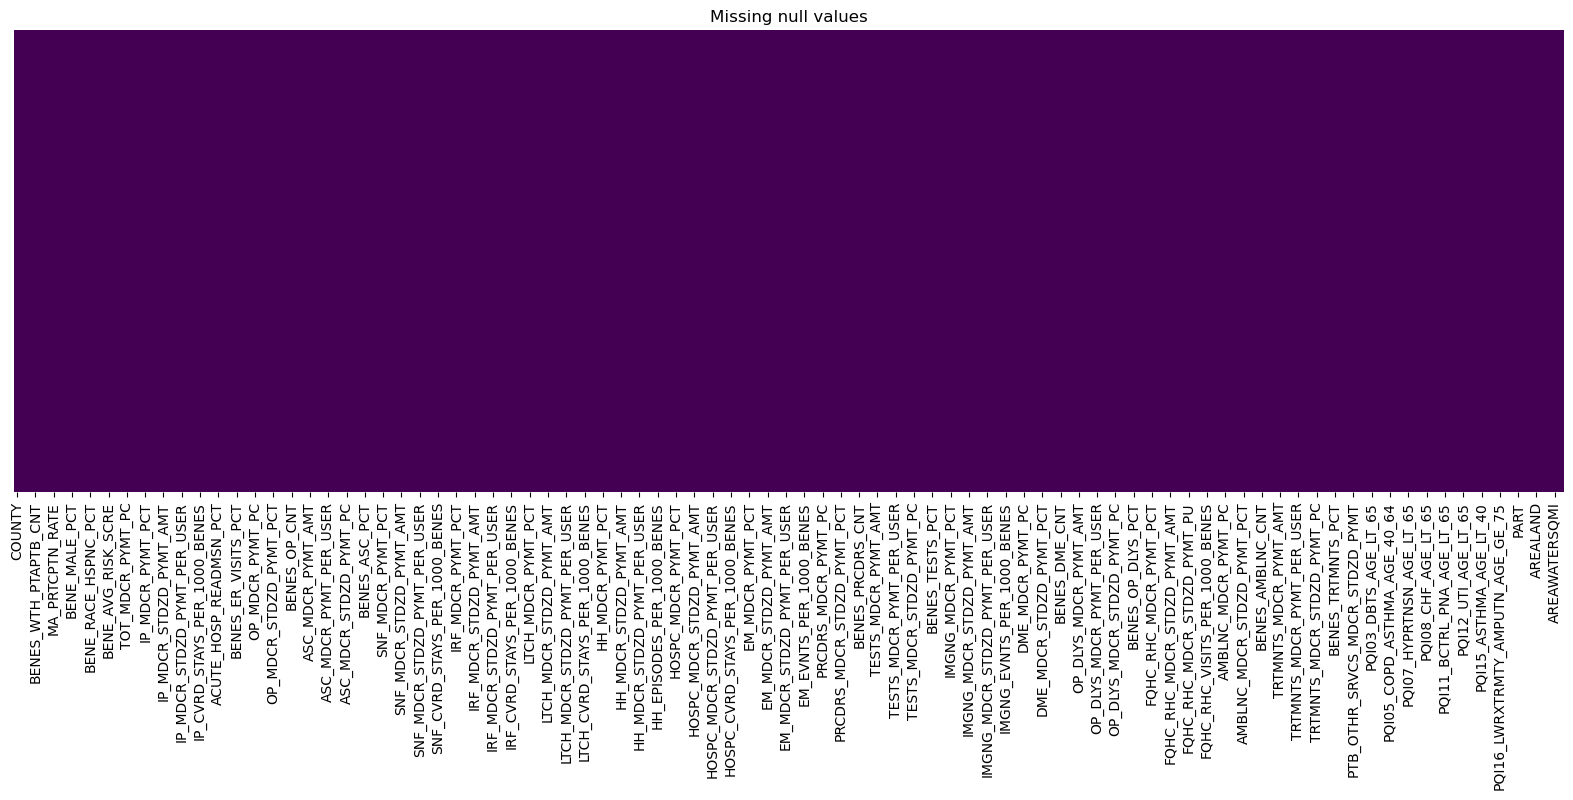

In [24]:
missing_percentage_pd = (
    result.isnull().mean() * 100  # Calculate percentage of missing values
).reset_index()

# Rename columns for clarity
missing_percentage_pd.columns = ["Column", "Missing_Percentage"]

# Save the missing percentage data to a CSV file
missing_percentage_pd.to_csv("missing_percentages_sdoh_county.csv", index=False)

# Create a binary matrix for missing values (0 = not missing, 1 = missing)
missing_matrix = result.isnull().astype(int)

# Plot the heatmap of missing values
plt.figure(figsize=(20, 6))
sns.heatmap(missing_matrix, yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing null values")
#plt.savefig("figures/missing_percentages_COUNTY.png", format="png", dpi=800)
plt.show()